In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('gender_submission.csv')
df2['Survived'] = df3['Survived']
df=pd.concat([df,df2],sort=False)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


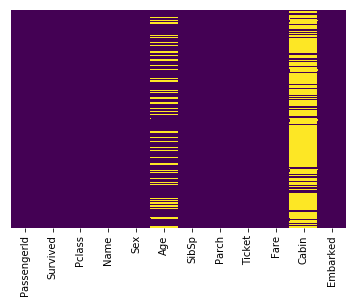

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
df.drop(['Cabin'],inplace=True,axis=1)

In [28]:
df.count()

PassengerId    1309
Survived       1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Embarked       1307
dtype: int64

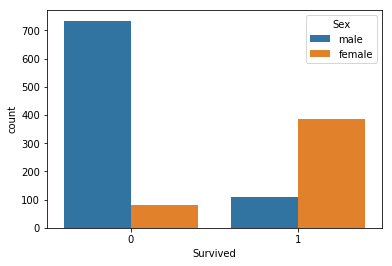

In [29]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [30]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df['Embarked']= df['Embarked'].map({'S':0,'C':1,'Q':2})

In [34]:
df['Embarked'].fillna(0,inplace=True)

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

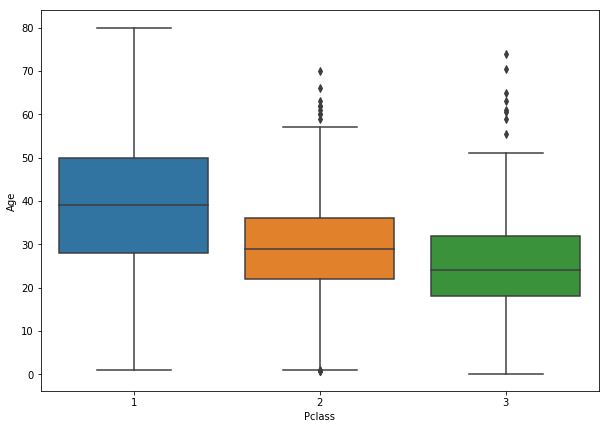

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [37]:
def setAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age
df['Age'] = df[['Age','Pclass']].apply(setAge,axis=1)

In [38]:
df.dropna(inplace=True,axis=0)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare','Age', 'Embarked']],df['Survived'])


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(solver='liblinear').fit(x_train,y_train)

In [41]:
lr.score(x_test,y_test)

0.8409785932721713